# Web Scraping 

The process of retrieving data or content from a web page is called web scraping. This is probably more appropriately called screen scraping. This lesson will identify major concepts within web page design, content retrieval, and web scraping best practices and tools.

Adapted from __Rebecca Weiss's__ [VAM tutorial](https://github.com/rjweiss/VAM-Python) by Mark Stacy


## Topics

1. [Analyze web page](#Analyze-Web-Pages)
    1. HTML HyperText Markup Language
    2. Web Borwser Tools
2. [Python Web Scraping Tools](#Python-libraries:-BeautifulSoup,-lxml,-and-Pandas)
    1. Bueatiful Soup
    2. Lxml
    3. Pandas
3. [Beautiful Soup Example](#Beautiful-Soup) 
4. [Pandas Example](#Pandas-Quick-Example)
5. Web Scraping Best Practices


## Lesson

This lesson will scrape the political party platform from  [American Presidency Project]('http://www.presidency.ucsb.edu/platforms.php'). The main page contains links for each politcal party platform organized by party and year. The main objective is to retrieve the appropriate platform links and download the text of each platform and save the content to a file.

In [4]:
from IPython.display import HTML

presidency_platforms_url = 'http://www.presidency.ucsb.edu/platforms.php'

HTML("<iframe src=" + presidency_platforms_url + " width=100% height=400px></iframe>")

## Analyze Web Pages

Investigating how the page is setup will determine which tool will be most appropriate. Determine location of content and the HTML structure that encapsulates the content. 

### Web Browser Tools

Most modern browser comes with tools to inverstigate page.

- Chrome, Inspect Element
- Firefox, Inspect Element
- Internet Explore






### HTML - HyperText Markup Language

HyperText Markup Language, commonly referred to as HTML, is the standard markup language used to create web pages.

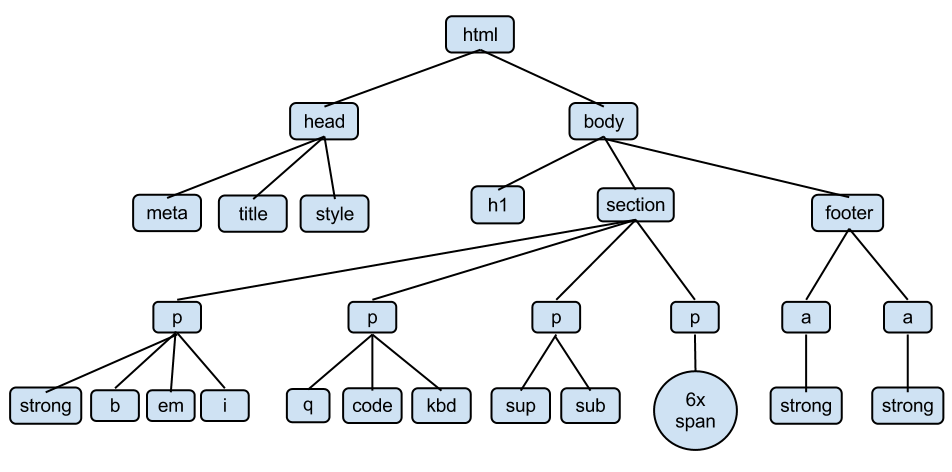

In [2]:
from IPython.display import Image
Image('http://www.openbookproject.net/tutorials/getdown/css/images/lesson4/HTMLDOMTree.png')


## The HTML Document versus the DOM

Most modern browsers have a _parser_ that reads in the HTML **document**, parses it into a DOM structure, and renders the **DOM** structure.

Much like HTTP, the DOM is an [agreed-upon standard](http://www.w3.org/DOM/).

The DOM is [much more than what I've described](https://developer.mozilla.org/en-US/docs/DOM), but we don't have the time to go into it.

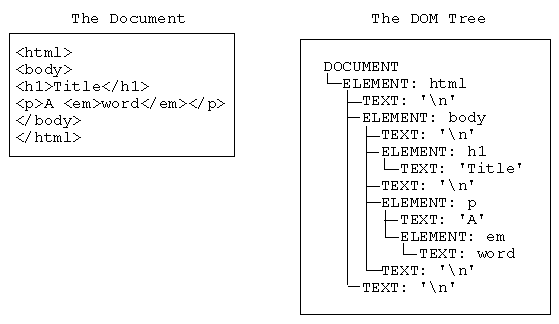

In [3]:
Image('http://www.cs.toronto.edu/~shiva/cscb07/img/dom/treeStructure.png')

## Python libraries: `BeautifulSoup`, `lxml`, and Pandas

### `BeautifulSoup`
- Good for messy HTML ([doesn't pass validation](http://validator.w3.org/))
- Pure Python (easier to install)
- [CSS Selctors](http://www.crummy.com/software/BeautifulSoup/bs4/doc/#css-selectors)

### `lxml`
- More powerful parsing capabilities: `XPath`, `CSS Selectors`
- Has C dependencies (can be hard to install if you don't feel comfortable building software from source)
- Can work with more than HTML (e.g. XML).

### `Pandas`
- Powerful tool to pull data from multiple formats
- HTML Tables Tags
- CSV Comma Separted values
- Fixed Width Data

Depending on the page will determine which tool to implement. We're going to do an example with BeautifulSoup.

## ** Request/Response model ** 

[Request/response](http://en.wikipedia.org/wiki/Request-response) is a [messaging protocol](http://en.wikipedia.org/wiki/Messaging_pattern).

It is the underlying architectural model for the [Hypertext Transfer Protocol](http://en.wikipedia.org/wiki/HTTP), which is the agreed-upon standard for the way the Web works.

The very general, grossly oversimplified idea: 

1. Clients (like you!) issue requests to servers
2. Servers issue responses if they receive a request

Servers sit around waiting to respond to requests.  If a server doesn't respond, ** something is wrong **.

In [5]:
#Python Library for retrieving page
# urllib is another library
import requests

r = requests.get(presidency_platforms_url)

r.text[:1000]

'<html>\r\n<head>\r\n<title>Political Party Platforms</title>\r\n<META HTTP-EQUIV="Content-Type" CONTENT="text/html; charset=windows-1251">\r\n<meta name="keywords" content="President of the United States, presidency, American Presidency, American President, Public Papers of the Presidents, State of the Union Address, Inaugural Address, Presidents, American Presidents, George W. Bush, Bill Clinton, George Bush, Ronald Reagan, Jimmy Carter, Gerald Ford, Richard Nixon, Lyndon Johnson, John F. Kennedy. John Kennedy, Dwight Eisenhower, Harry Truman, FDR, Franklin Roosevelt, Presidential Elections, Presidential Rhetoric">\r\n<meta name="description" content="The American Presidency Project contains the most comprehensive collection of resources pertaining to the study of the President of the United States.  Compiled by John Woolley and Gerhard Peters">\r\n<link href="http://www.presidency.ucsb.edu/styles/main.css" rel="stylesheet" type="text/css">\r\n<!-- BEGIN Tynt Script -->\r\n<!-- <scri

In [6]:
r.status_code

200

** What's a status code? **

The Web only works because everybody agreed to honor HTTP.

All HTTP clients (e.g. a web browser) *must* recognize [status codes](http://en.wikipedia.org/wiki/List_of_HTTP_status_codes).

Generally:
- 2XX is good
- 4XX and 5XX are bad

If you write a script to automate scraping, __check for status code = 200__.  Otherwise, you might get junk data!

## Beautiful Soup 

Beautiful Soup is a Python library for pulling content out of HTML and XML files.

In [7]:
from bs4 import  BeautifulSoup

presidency_platforms_url = 'http://www.presidency.ucsb.edu/platforms.php'

#load page in variable
r = requests.get(presidency_platforms_url)


In [8]:
r.text[:1000]

'<html>\r\n<head>\r\n<title>Political Party Platforms</title>\r\n<META HTTP-EQUIV="Content-Type" CONTENT="text/html; charset=windows-1251">\r\n<meta name="keywords" content="President of the United States, presidency, American Presidency, American President, Public Papers of the Presidents, State of the Union Address, Inaugural Address, Presidents, American Presidents, George W. Bush, Bill Clinton, George Bush, Ronald Reagan, Jimmy Carter, Gerald Ford, Richard Nixon, Lyndon Johnson, John F. Kennedy. John Kennedy, Dwight Eisenhower, Harry Truman, FDR, Franklin Roosevelt, Presidential Elections, Presidential Rhetoric">\r\n<meta name="description" content="The American Presidency Project contains the most comprehensive collection of resources pertaining to the study of the President of the United States.  Compiled by John Woolley and Gerhard Peters">\r\n<link href="http://www.presidency.ucsb.edu/styles/main.css" rel="stylesheet" type="text/css">\r\n<!-- BEGIN Tynt Script -->\r\n<!-- <scri

In [17]:
r.headers

{'Date': 'Wed, 09 Dec 2015 17:25:02 GMT', 'Vary': 'Accept-Encoding', 'Content-Length': '4126', 'Content-Encoding': 'gzip', 'Content-Type': 'text/html', 'Server': 'Apache', 'Keep-Alive': 'timeout=15, max=100', 'Connection': 'Keep-Alive'}

In [18]:
# Load Beautiful Soup with requests text

soup= BeautifulSoup(r.text,'html.parser')

In [19]:
soup.prettify()[0:1000]


'<html>\n <head>\n  <title>\n   Political Party Platforms\n  </title>\n  <meta content="text/html; charset=utf-8" http-equiv="Content-Type">\n   <meta content="President of the United States, presidency, American Presidency, American President, Public Papers of the Presidents, State of the Union Address, Inaugural Address, Presidents, American Presidents, George W. Bush, Bill Clinton, George Bush, Ronald Reagan, Jimmy Carter, Gerald Ford, Richard Nixon, Lyndon Johnson, John F. Kennedy. John Kennedy, Dwight Eisenhower, Harry Truman, FDR, Franklin Roosevelt, Presidential Elections, Presidential Rhetoric" name="keywords">\n    <meta content="The American Presidency Project contains the most comprehensive collection of resources pertaining to the study of the President of the United States.  Compiled by John Woolley and Gerhard Peters" name="description">\n     <link href="http://www.presidency.ucsb.edu/styles/main.css" rel="stylesheet" type="text/css">\n      <!-- BEGIN Tynt Script -->\n 

In [20]:
soup.title

<title>Political Party Platforms</title>

In [21]:
soup.meta

<meta content="text/html; charset=utf-8" http-equiv="Content-Type">
<meta content="President of the United States, presidency, American Presidency, American President, Public Papers of the Presidents, State of the Union Address, Inaugural Address, Presidents, American Presidents, George W. Bush, Bill Clinton, George Bush, Ronald Reagan, Jimmy Carter, Gerald Ford, Richard Nixon, Lyndon Johnson, John F. Kennedy. John Kennedy, Dwight Eisenhower, Harry Truman, FDR, Franklin Roosevelt, Presidential Elections, Presidential Rhetoric" name="keywords">
<meta content="The American Presidency Project contains the most comprehensive collection of resources pertaining to the study of the President of the United States.  Compiled by John Woolley and Gerhard Peters" name="description">
<link href="http://www.presidency.ucsb.edu/styles/main.css" rel="stylesheet" type="text/css">
<!-- BEGIN Tynt Script -->
<!-- <script type="text/javascript">
if(document.location.protocol=='http:'){
 var Tynt=Tynt||[];

In [22]:
soup.title.text

'Political Party Platforms'

In [23]:
soup.a

<a href="../index.php"><img alt="Home" border="0" height="29" src="http://www.presidency.ucsb.edu/images/l1.gif" width="26"/></a>

In [24]:
soup.p

<p><span class="datatitle">Political Party Platforms of Parties Receiving Electoral Votes: </span><span class="datadates">1840 - 2012</span></p>

## What are these functions?
Beautiful Soup has written some functions that are helpful for working with *HTML*.  They are essentially wrappers to retrieve very common **HTML elements**.

Next step to get all links on the main page!

In [25]:
all_links=[]
for link in soup.findAll('a'):
    all_links.append(link.get('href'))
print("All links href in a list from a for loop: %s" % (len(all_links)))

All links href in a list from a for loop: 144


In [104]:
all_links[40:60]

['http://www.presidency.ucsb.edu/ws/index.php?pid=101962',
 'papers_pdf/101962.pdf',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=78283',
 'http://www.presidency.ucsb.edu/papers_pdf/78283.pdf',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=29613',
 'http://www.presidency.ucsb.edu/papers_pdf/29613.pdf',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=29612',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=29611',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=29610',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=29609',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=29608',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=29607',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=29606',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=29605',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=29604',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=29603',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=29602',
 'http://www.presidency.ucsb.edu/ws/index.php?pid

In [105]:
for link in all_links[40:60]:
    print ('href #%s = %s' % (str(all_links.index(link)),link.split('/')[-1]))

href #40 = index.php?pid=101962
href #41 = 101962.pdf
href #42 = index.php?pid=78283
href #43 = 78283.pdf
href #44 = index.php?pid=29613
href #45 = 29613.pdf
href #46 = index.php?pid=29612
href #47 = index.php?pid=29611
href #48 = index.php?pid=29610
href #49 = index.php?pid=29609
href #50 = index.php?pid=29608
href #51 = index.php?pid=29607
href #52 = index.php?pid=29606
href #53 = index.php?pid=29605
href #54 = index.php?pid=29604
href #55 = index.php?pid=29603
href #56 = index.php?pid=29602
href #57 = index.php?pid=29601
href #58 = index.php?pid=29600
href #59 = index.php?pid=29599


In [106]:
# Get all Valid Links
valid_links =[]
for link in all_links:
    final_url_element = link.split('/')[-1]
    if final_url_element.startswith('index.php?'):
        valid_links.append(link)

print("There are %d valid links." % (len(valid_links)))

There are 96 valid links.


In [107]:
valid_links[:10]

['http://www.presidency.ucsb.edu/ws/index.php?pid=101962',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=78283',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=29613',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=29612',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=29611',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=29610',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=29609',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=29608',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=29607',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=29606']

In [26]:
r =requests.get('http://www.presidency.ucsb.edu/ws/index.php?pid=101962')
soup = BeautifulSoup(r.text,'html.parser')

In [27]:
soup.title


<title>Democratic Party Platforms: 2012 Democratic Party Platform</title>

In [28]:
soup.title.text.replace(' ','_').replace(':','')

'Democratic_Party_Platforms_2012_Democratic_Party_Platform'

In [29]:
soup.p.get_text()[:2000]

"Four years ago, Democrats, independents, and many Republicans came together as Americans to move our country forward. We were in the midst of the greatest economic crisis since the Great Depression, the previous administration had put two wars on our nation's credit card, and the American Dream had slipped out of reach for too many. Today, our economy is growing again, al-Qaeda is weaker than at any point since 9/11, and our manufacturing sector is growing for the first time in more than a decade. But there is more we need to do, and so we come together again to continue what we started. We gather to reclaim the basic bargain that built the largest middle class and the most prosperous nation on Earth - the simple principle that in America, hard work should pay off, responsibility should be rewarded, and each one of us should be able to go as far as our talent and drive take us. This election is not simply a choice between two candidates or two political parties, but between two fundam

In [39]:
soup.select('.displaytext')[0].get_text()[:1000]


"Moving America Forward2012 Democratic National PlatformMoving America ForwardFour years ago, Democrats, independents, and many Republicans came together as Americans to move our country forward. We were in the midst of the greatest economic crisis since the Great Depression, the previous administration had put two wars on our nation's credit card, and the American Dream had slipped out of reach for too many. Today, our economy is growing again, al-Qaeda is weaker than at any point since 9/11, and our manufacturing sector is growing for the first time in more than a decade. But there is more we need to do, and so we come together again to continue what we started. We gather to reclaim the basic bargain that built the largest middle class and the most prosperous nation on Earth - the simple principle that in America, hard work should pay off, responsibility should be rewarded, and each one of us should be able to go as far as our talent and drive take us. This election is not simply a c

In [60]:
def replace_with_newlines(element):
    text = ''
    for elem in element.recursiveChildGenerator():
        if isinstance(elem, str):
            text += elem.strip()
        elif elem.name == 'br':
            text += '\n'
    return text

data = soup.select('.displaytext')
for item in data:
    for itm in item.findChildren(['p','h2','h3']):
        text = replace_with_newlines(itm)
        print("%s \n" % text[:1000])
        #print("%s \n" % itm.get_text()[:1000])
        

Moving America Forward
2012 Democratic National Platform 

Moving America Forward 

Four years ago, Democrats, independents, and many Republicans came together as Americans to move our country forward. We were in the midst of the greatest economic crisis since the Great Depression, the previous administration had put two wars on our nation's credit card, and the American Dream had slipped out of reach for too many.Today, our economy is growing again, al-Qaeda is weaker than at any point since 9/11, and our manufacturing sector is growing for the first time in more than a decade. But there is more we need to do, and so we come together again to continue what we started. We gather to reclaim the basic bargain that built the largest middle class and the most prosperous nation on Earth - the simple principle that in America, hard work should pay off, responsibility should be rewarded, and each one of us should be able to go as far as our talent and drive take us.This election is not simply

In [116]:
import os
from datetime import datetime

#Create output directory
if not os.path.exists('output'):
    os.makedirs('output')

#Create log file and set header row
request_log_file = open('output/president_scraping.log','w')
request_log_file.write("Timestamp\tURL\tStatus Code \n")

print("Start Scraping")
for link in valid_links:
    #Load page
    r = requests.get(link)
    #Log Row setup
    tmpl = "{time}\t{link}\t{status}\n"
    request_event_string = tmpl.format(time=datetime.isoformat(datetime.now()),link=link,status=r.status_code)
    request_log_file.write(request_event_string)
    #Beautiful Soup 
    soup =BeautifulSoup(r.text,'html.parser')
    #setup filename and path
    filename = "%s.txt" % (soup.title.text.replace(' ','_').replace(':','').replace('/','-'))
    filename_path = os.path.join('output',filename)
    #Write data to file
    with open(filename_path,'w') as scraped_text:
        data = soup.select('.displaytext')
        for item in data:
            for itm in item.children:
                try:
                    scraped_text.write(itm.get_text())
                except:
                    pass

request_log_file.close()
print("Finished scraping!")


Start Scraping
Finished scraping!


## Pandas Quick Example

Want to get Oklahoma City Thunder Team statistics!

Requires Python library html5lib

$ pip install html5lib

Requires restart of ipython notebook!

In [115]:
import pandas as pd

espn_okc_thunder = "http://espn.go.com/nba/team/stats/_/name/okc/oklahoma-city-thunder"

data = pd.read_html(espn_okc_thunder)
#returns a list of every html table with data.

data[0]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,GAME STATISTICS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PLAYER,GP,GS,MIN,PPG,OFFR,DEFR,RPG,APG,SPG,BPG,TPG,FPG,A/TO,PER
2,"Kevin Durant, SF",14,14,35.4,27.6,0.2,7.5,7.7,3.6,0.93,1.50,3.2,1.3,1.1,29.1
3,"Russell Westbrook, PG",20,20,34.7,27.1,1.9,5.6,7.5,9.6,2.40,0.30,5.3,2.4,1.8,31.0
4,"Serge Ibaka, PF",20,20,32.1,12.9,2.3,4.9,7.2,1.0,0.40,2.50,1.3,3.0,0.8,15.7
5,"Enes Kanter, C",20,0,20.9,12.0,3.1,5.1,8.2,0.7,0.05,0.40,1.3,2.4,0.5,23.6
6,"Dion Waiters, SG",20,2,28.0,10.7,0.6,3.0,3.6,2.1,1.15,0.15,1.6,2.1,1.3,11.3
7,"Steven Adams, C",20,20,23.7,6.0,2.3,3.6,5.9,0.9,0.35,1.50,0.8,3.0,1.1,13.9
8,"Anthony Morrow, SG",19,4,16.2,5.5,0.2,0.9,1.1,0.4,0.58,0.05,0.4,0.8,1.0,9.0
9,"D.J. Augustin, PG",20,0,16.9,5.2,0.3,1.2,1.4,2.2,0.50,0.05,1.2,1.1,1.8,10.0


In [82]:
pd.read_html?

In [118]:
data = pd.read_html(espn_okc_thunder,skiprows=1,header=0)

In [119]:
data[0]

,PLAYER,GP,GS,MIN,PPG,OFFR,DEFR,RPG,APG,SPG,BPG,TPG,FPG,A/TO,PER
0,"Kevin Durant, SF",14,14,35.4,27.6,0.2,7.5,7.7,3.6,0.93,1.50,3.2,1.3,1.1,29.1
1,"Russell Westbrook, PG",20,20,34.7,27.1,1.9,5.6,7.5,9.6,2.40,0.30,5.3,2.4,1.8,31.0
2,"Serge Ibaka, PF",20,20,32.1,12.9,2.3,4.9,7.2,1.0,0.40,2.50,1.3,3.0,0.8,15.7
3,"Enes Kanter, C",20,0,20.9,12.0,3.1,5.1,8.2,0.7,0.05,0.40,1.3,2.4,0.5,23.6
4,"Dion Waiters, SG",20,2,28.0,10.7,0.6,3.0,3.6,2.1,1.15,0.15,1.6,2.1,1.3,11.3
5,"Steven Adams, C",20,20,23.7,6.0,2.3,3.6,5.9,0.9,0.35,1.50,0.8,3.0,1.1,13.9
6,"Anthony Morrow, SG",19,4,16.2,5.5,0.2,0.9,1.1,0.4,0.58,0.05,0.4,0.8,1.0,9.0
7,"D.J. Augustin, PG",20,0,16.9,5.2,0.3,1.2,1.4,2.2,0.50,0.05,1.2,1.1,1.8,10.0
8,"Andre Roberson, SG",19,19,23.5,4.6,0.9,2.6,3.6,0.7,0.79,0.53,0.6,2.1,1.1,8.0
9,"Steve Novak, SF",1,0,1.0,3.0,0.0,1.0,1.0,0.0,0.00,0.00,0.0,0.0,0.0,152.9


In [120]:
data[1]

,PLAYER,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,PPS,AFG%
0,"Kevin Durant, SF",9.5,18.4,0.516,2.7,6.2,0.437,5.9,6.6,0.880,6.8,12.2,0.556,1.496,0.59
1,"Russell Westbrook, PG",9.3,19.8,0.470,1.5,5.0,0.300,7.0,8.3,0.840,7.8,14.8,0.527,1.366,0.51
2,"Serge Ibaka, PF",5.8,12.0,0.483,0.5,1.3,0.360,0.9,1.3,0.680,5.3,10.7,0.498,1.075,0.50
3,"Enes Kanter, C",4.7,8.4,0.563,0.1,0.1,1.000,2.5,3.3,0.770,4.6,8.3,0.560,1.431,0.57
4,"Dion Waiters, SG",3.9,9.9,0.394,1.1,2.9,0.368,1.9,2.2,0.840,2.8,7.0,0.404,1.081,0.45
5,"Steven Adams, C",2.4,4.2,0.571,0.0,0.0,0.000,1.2,2.0,0.580,2.4,4.2,0.571,1.417,0.57
6,"Anthony Morrow, SG",2.0,5.3,0.376,1.2,3.2,0.383,0.3,0.3,0.830,0.8,2.1,0.366,1.030,0.49
7,"D.J. Augustin, PG",1.8,4.4,0.402,0.9,2.1,0.415,0.8,1.2,0.700,0.9,2.3,0.391,1.184,0.50
8,"Andre Roberson, SG",1.8,4.4,0.422,0.5,1.9,0.278,0.4,0.7,0.570,1.3,2.5,0.532,1.060,0.48
9,"Steve Novak, SF",1.0,1.0,1.000,1.0,1.0,1.000,0.0,0.0,0.000,0.0,0.0,0.000,3.000,1.50
